In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jun 13 21:06:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [ ]:
!git clone https://github.com/elibooklover/Deep-Learning-for-Humanists-2023
!python Deep-Learning-for-Humanists-2023/data_loader.py --data GAN-Colorization
!unzip -q Victorian400.zip

Cloning into 'Deep-Learning-for-Humanists-2023'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 31 (delta 7), reused 22 (delta 5), pack-reused 0
Unpacking objects: 100% (31/31), 5.88 KiB | 215.00 KiB/s, done.
Downloading...
From: https://drive.google.com/uc?id=1_NX9egQeck5gmmTQD9SmJULWSpSIfcZV
To: /content/Victorian400.zip
100% 508M/508M [00:02<00:00, 180MB/s]
Victorian400.zip download complete!


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import cv2

In [ ]:
origin_dir = 'original/'
resized_dir = 'resized/'
gray_dir = 'gray/'

print('number of files in "original" folder:', len(os.listdir(origin_dir)))
print('number of files in "resized" folder:', len(os.listdir(resized_dir)))
print('number of files in "gray" folder:', len(os.listdir(gray_dir)))

number of files in "original" folder: 400
number of files in "resized" folder: 400
number of files in "gray" folder: 400


In [ ]:
test_dir = 'test/'

print(os.listdir(test_dir))
print('number of files in "test/gray" folder:', len(os.listdir(test_dir + 'gray')))
print('number of files in "test/resized" folder:', len(os.listdir(test_dir + 'resized')))

['.DS_Store', 'resized', 'gray']
number of files in "test/gray" folder: 6
number of files in "test/resized" folder: 6


In [ ]:
origin_files = sorted(glob.glob(origin_dir + '*'))
resized_files = sorted(glob.glob(resized_dir + '*'))
gray_files = sorted(glob.glob(gray_dir + '*'))

In [ ]:
print(origin_files[:2])
print(resized_files[:2])
print(gray_files[:2])

['original/Victorian1.png', 'original/Victorian10.png']
['resized/Victorian1.png', 'resized/Victorian10.png']
['gray/Victorian1.png', 'gray/Victorian10.png']


In [ ]:
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

original/Victorian108.png
(895, 570, 3)


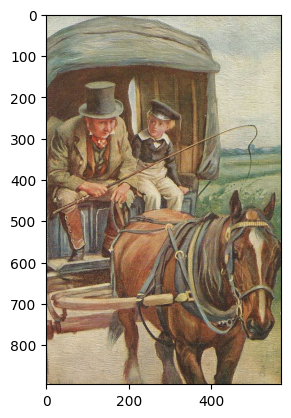

In [ ]:
img_arr = read_img(origin_files[10])

# file path
print(origin_files[10])

# image size
print(img_arr.shape)

# image visualization
plt.imshow(img_arr)

resized/Victorian108.png
(256, 256, 3)


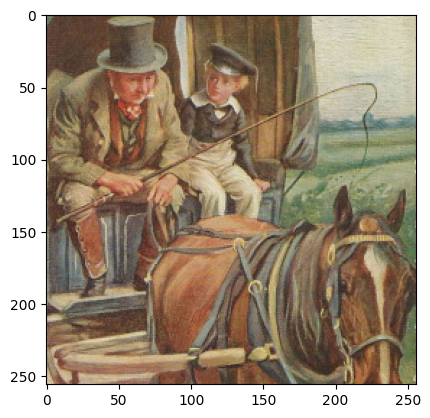

In [ ]:
img_arr = read_img(resized_files[10])

print(resized_files[10])
print(img_arr.shape)
plt.imshow(img_arr)

gray/Victorian1.png
(256, 256, 3)


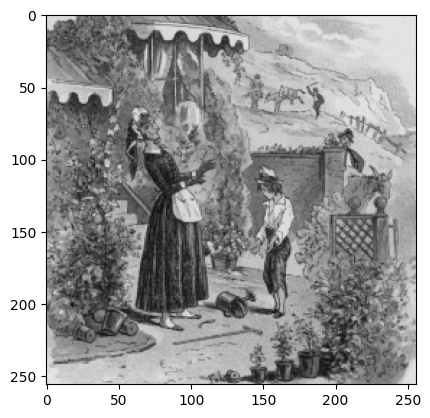

In [ ]:
img_arr = read_img(gray_files[0])

print(gray_files[0])
print(img_arr.shape)
plt.imshow(img_arr)

## Visualization using plt.subplots().

In [ ]:
img_arrs = []
img_num = 5

for idx in range(img_num):
    img_arrs.append(read_img(origin_files[idx]))
    img_arrs.append(read_img(resized_files[idx]))
    img_arrs.append(read_img(gray_files[idx]))

In [ ]:
len(img_arrs)

15

In [ ]:
rows = img_num
columns = 3

# Setting display options
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

# Display images in each section
for num in range(1, rows*columns+1): # From 1 to 15
    fig.add_subplot(rows, columns, num) # Put numbers where you want
    idx = num - 1
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # Adjusting the distance between images

for file_idx, ax in enumerate(axes[:,0]): # Enumerate the first row of images
    ax.set_ylabel(f'{sorted(os.listdir(origin_dir))[file_idx]}',  # Setting file names as y axis labels
    rotation=0,
    fontsize=12,
    labelpad=100) # Adjusting the distance between labels and y axis

cols = ['origin', 'resized', 'gray']

# Title
for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# Removing xtick, ytick
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

Output hidden; open in https://colab.research.google.com to view.

## Image preprocessing

In [ ]:
import numpy as np

def get_mean_and_std(files):
    # Calculating global mean
    global_mean = 0
    global_var = 0

    for img in files:
        img_arr = read_img(img) / 255
        global_mean += img_arr.reshape(-1, 3).mean(axis=0)

    global_mean /= len(files)

    # Calculating global std
    for img in files:
        img_arr = read_img(img) / 255
        global_var += ((img_arr.reshape(-1, 3) - global_mean)**2).mean(axis=0)

    global_var /= len(files)
    global_std = np.sqrt(global_var)

    return global_mean, global_std

In [ ]:
color_mean, color_std = get_mean_and_std(resized_files)
color_mean, color_std

(array([0.58051155, 0.52648329, 0.45665852]),
 array([0.25650163, 0.25488575, 0.2440987 ]))

In [ ]:
gray_mean, gray_std = get_mean_and_std(gray_files)
gray_mean, gray_std

(array([0.53468643, 0.53468643, 0.53468643]),
 array([0.25057785, 0.25057785, 0.25057785]))

In [ ]:
resized_files[0]

'resized/Victorian1.png'

In [ ]:
color_img = read_img(resized_files[0]) / 255
gray_img = read_img(gray_files[0]) / 255

In [ ]:
import pandas as pd

def get_statistics(arr):
    return pd.DataFrame(arr.reshape(-1, 3), columns=["R", "G", "B"]).describe()

In [ ]:
get_statistics(color_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.564941,0.537205,0.493146
std,0.208751,0.203116,0.198431
min,0.027451,0.039216,0.058824
25%,0.411765,0.380392,0.333333
50%,0.584314,0.533333,0.478431
75%,0.745098,0.709804,0.650980
max,0.929412,0.913725,0.909804


In [ ]:
get_statistics(gray_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.540488,0.540488,0.540488
std,0.201794,0.201794,0.201794
min,0.047059,0.047059,0.047059
25%,0.388235,0.388235,0.388235
50%,0.541176,0.541176,0.541176
75%,0.713725,0.713725,0.713725
max,0.917647,0.917647,0.917647


In [ ]:
normalized_color_img = (color_img - color_mean) / color_std
normalized_gray_img = (gray_img - gray_mean) / gray_std

In [ ]:
get_statistics(normalized_color_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,-0.060702,0.042063,0.149479
std,0.813841,0.796889,0.812913
min,-2.156168,-1.911710,-1.629812
25%,-0.657878,-0.573163,-0.505227
50%,0.014823,0.026875,0.089197
75%,0.641659,0.719227,0.796079
max,1.360226,1.519278,1.856402


In [ ]:
get_statistics(normalized_gray_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.023152,0.023152,0.023152
std,0.805316,0.805316,0.805316
min,-1.946012,-1.946012,-1.946012
25%,-0.584454,-0.584454,-0.584454
50%,0.025900,0.025900,0.025900
75%,0.714505,0.714505,0.714505
max,1.528310,1.528310,1.528310
